In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error

# Set style for better plots
plt.style.use('seaborn-v0_8')
np.random.seed(42)

In [2]:
# Generate random dataset and split into train/test
np.random.seed(42)
n_samples = 2500
y = np.random.normal(50, 15, n_samples)

y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

noise_test = np.random.normal(0, 8, len(y_test))
bias_test = np.random.normal(2, 3, len(y_test))
y_pred_test = y_test + noise_test + bias_test

In [3]:
# Calculate all metrics on the test set using sklearn
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
mape = mean_absolute_percentage_error(y_test, y_pred_test) * 100

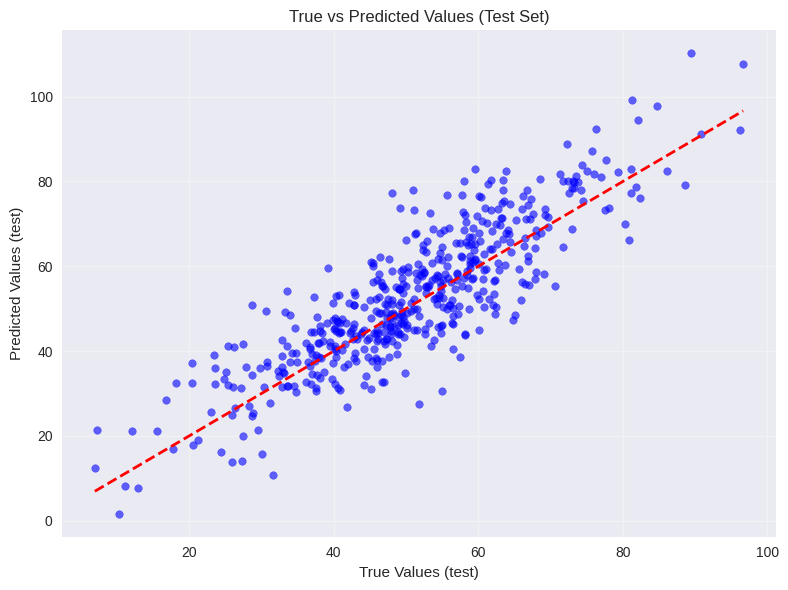

In [4]:
# True vs Predicted Values (Test Set)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='blue', s=30)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values (test)')
plt.ylabel('Predicted Values (test)')
plt.title('True vs Predicted Values (Test Set)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [5]:
# Training Simulation
def simulate_training_errors(y_true, n_epochs=50):
    np.random.seed(42)
    mae_history, mse_history, rmse_history, mape_history = [], [], [], []
    
    for epoch in range(n_epochs):
        noise_level = 20 * np.exp(-epoch / 15)
        noise = np.random.normal(0, noise_level, len(y_true))
        y_pred_epoch = y_true + noise
        
        mae_history.append(mean_absolute_error(y_true, y_pred_epoch))
        mse_history.append(mean_squared_error(y_true, y_pred_epoch))
        rmse_history.append(root_mean_squared_error(y_true, y_pred_epoch))
        mape_history.append(mean_absolute_percentage_error(y_true, y_pred_epoch) * 100)
    
    return list(range(1, n_epochs+1)), mae_history, mse_history, rmse_history, mape_history

# Simulate training errors on the training set
epochs, mae_history, mse_history, rmse_history, mape_history = simulate_training_errors(y_train)

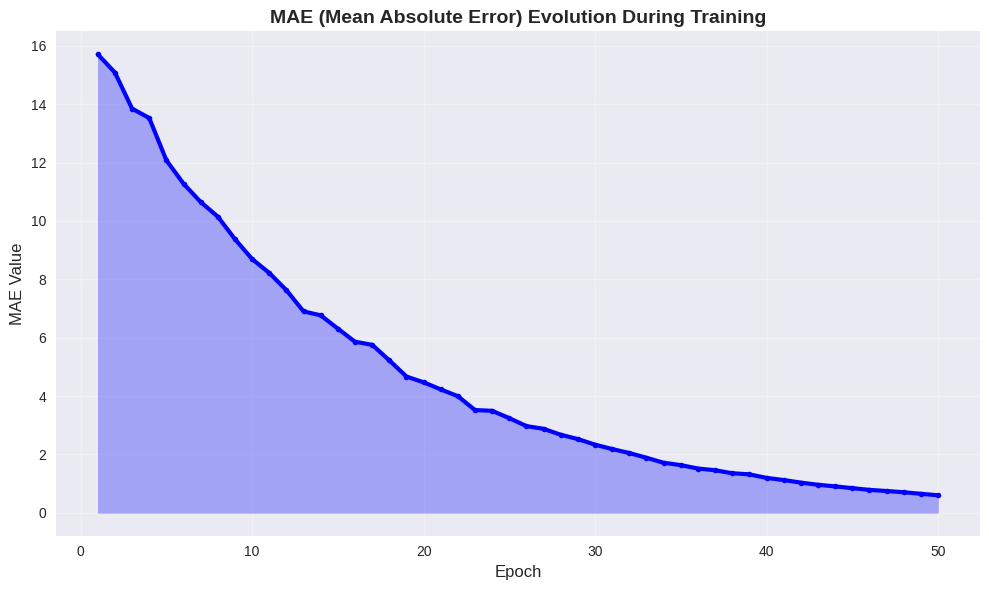

Final MAE: 0.600
Initial MAE: 15.711
Improvement: 96.2%


In [6]:
# Individual Graph for MAE (Mean Absolute Error)
plt.figure(figsize=(10, 6))
plt.plot(epochs, mae_history, 'b-', linewidth=3, marker='o', markersize=4)
plt.title('MAE (Mean Absolute Error) Evolution During Training', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MAE Value', fontsize=12)
plt.grid(True, alpha=0.3)
plt.fill_between(epochs, mae_history, alpha=0.3, color='blue')
plt.tight_layout()
plt.show()

print(f"Final MAE: {mae_history[-1]:.3f}")
print(f"Initial MAE: {mae_history[0]:.3f}")
print(f"Improvement: {((mae_history[0] - mae_history[-1]) / mae_history[0] * 100):.1f}%")

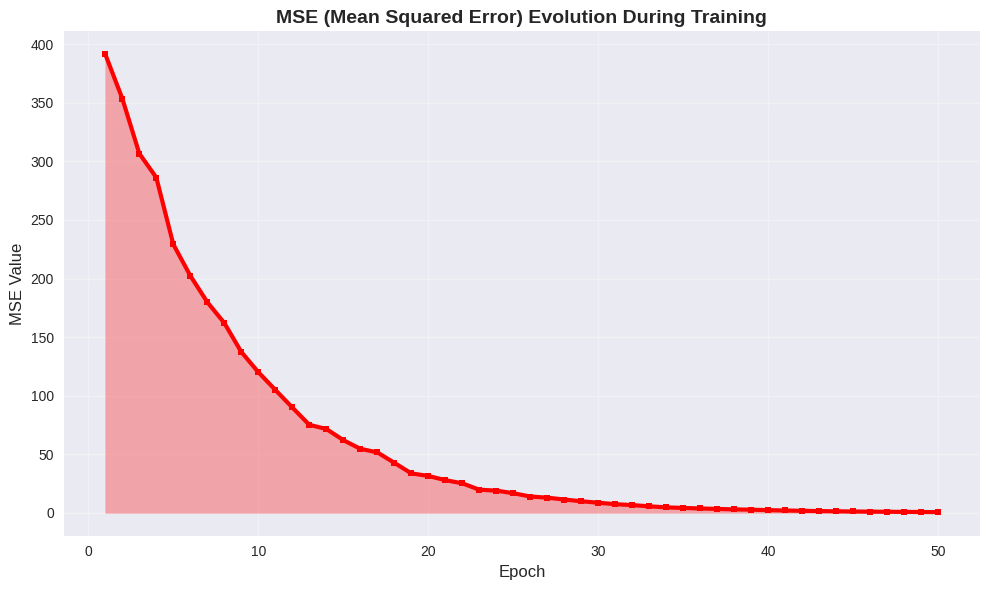

Final MSE: 0.569
Initial MSE: 391.443
Improvement: 99.9%


In [7]:
# Individual Graph for MSE (Mean Squared Error)
plt.figure(figsize=(10, 6))
plt.plot(epochs, mse_history, 'r-', linewidth=3, marker='s', markersize=4)
plt.title('MSE (Mean Squared Error) Evolution During Training', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE Value', fontsize=12)
plt.grid(True, alpha=0.3)
plt.fill_between(epochs, mse_history, alpha=0.3, color='red')
plt.tight_layout()
plt.show()

print(f"Final MSE: {mse_history[-1]:.3f}")
print(f"Initial MSE: {mse_history[0]:.3f}")
print(f"Improvement: {((mse_history[0] - mse_history[-1]) / mse_history[0] * 100):.1f}%")

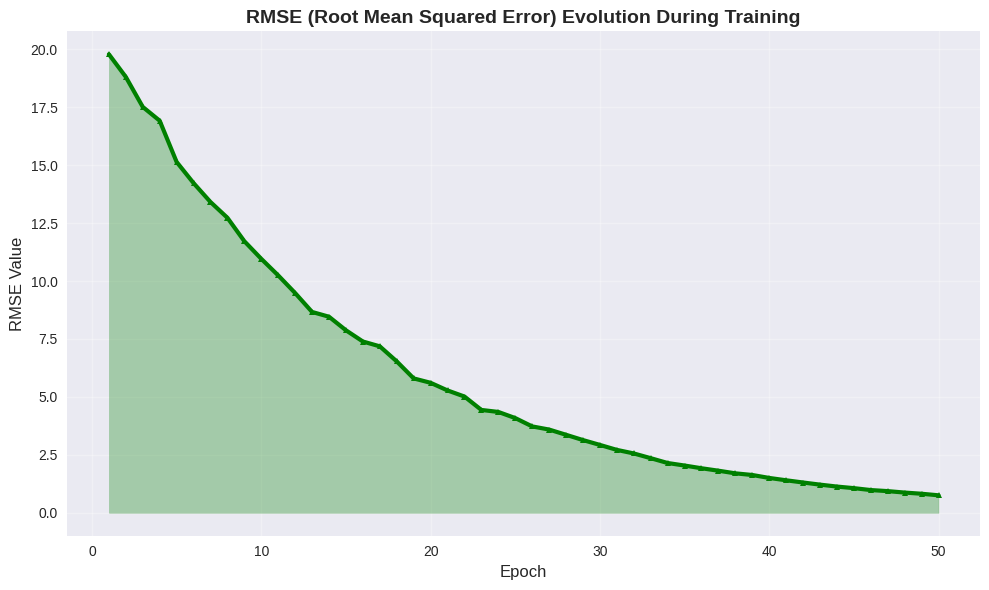

Final RMSE: 0.754
Initial RMSE: 19.785
Improvement: 96.2%


In [8]:
# Individual Graph for RMSE (Root Mean Squared Error)
plt.figure(figsize=(10, 6))
plt.plot(epochs, rmse_history, 'g-', linewidth=3, marker='^', markersize=4)
plt.title('RMSE (Root Mean Squared Error) Evolution During Training', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('RMSE Value', fontsize=12)
plt.grid(True, alpha=0.3)
plt.fill_between(epochs, rmse_history, alpha=0.3, color='green')
plt.tight_layout()
plt.show()

print(f"Final RMSE: {rmse_history[-1]:.3f}")
print(f"Initial RMSE: {rmse_history[0]:.3f}")
print(f"Improvement: {((rmse_history[0] - rmse_history[-1]) / rmse_history[0] * 100):.1f}%")

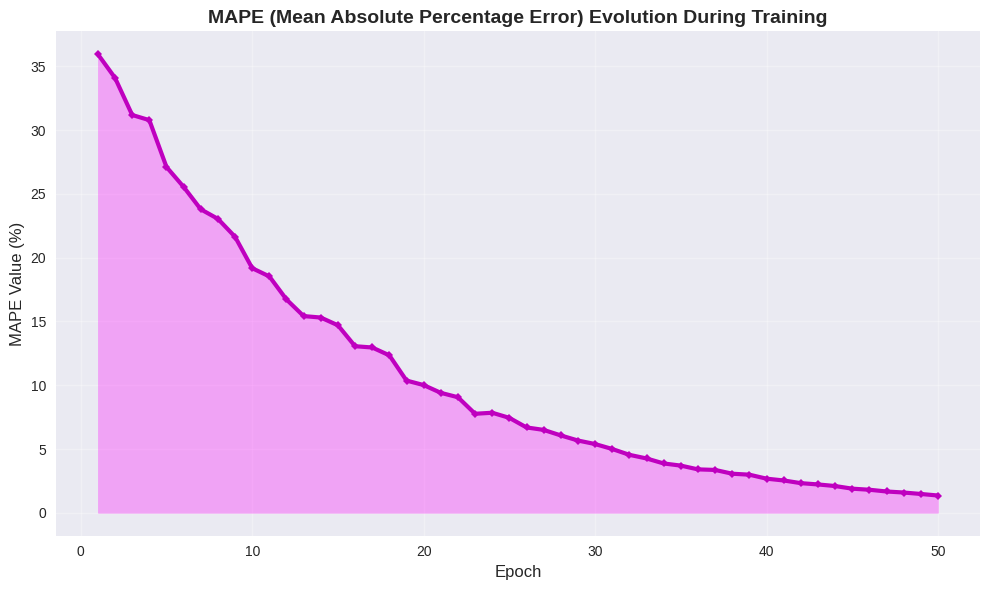

Final MAPE: 1.354%
Initial MAPE: 35.939%
Improvement: 96.2%


In [9]:
# Individual Graph for MAPE (Mean Absolute Percentage Error)
plt.figure(figsize=(10, 6))
plt.plot(epochs, mape_history, 'm-', linewidth=3, marker='D', markersize=4)
plt.title('MAPE (Mean Absolute Percentage Error) Evolution During Training', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MAPE Value (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.fill_between(epochs, mape_history, alpha=0.3, color='magenta')
plt.tight_layout()
plt.show()

print(f"Final MAPE: {mape_history[-1]:.3f}%")
print(f"Initial MAPE: {mape_history[0]:.3f}%")
print(f"Improvement: {((mape_history[0] - mape_history[-1]) / mape_history[0] * 100):.1f}%")